In [1]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [2]:
import numpy as np 
import pandas as pd 
import os
import gc
gc.enable()
import time
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS
from string import punctuation
import string

In [20]:
## Common Variables for Notebook 
directory = '/content/gdrive/MyDrive/DATA255_Group_Work/data/'

## load the data 
df_train = pd.read_csv(directory+'train.csv')
df_test = pd.read_csv(directory+'test.csv')
df_sub = pd.read_csv(directory+'sample_submission.csv')

In [4]:
#data format and types
print(df_train.info())
print(df_test.info())
print(df_sub.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0  

In [5]:
print('shape of training set: ', df_train.shape)
print('shape of testing set: ', df_test.shape)

shape of training set:  (7613, 5)
shape of testing set:  (3263, 4)


In [6]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [7]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


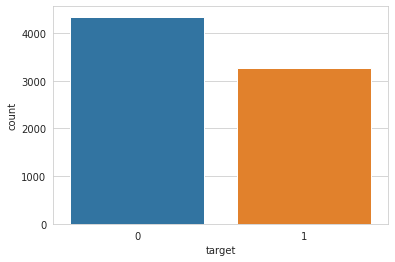

In [8]:
#check for label imbalance
target = df_train['target']
sns.set_style('whitegrid')
sns.countplot(target)

In [9]:
#locations of tweets
l = df_train["location"].to_list()
print('There is '+ str(len(set(l)))+" different loction")

There is 3342 different loction


In [10]:
#top 20 posting locations
df_train['location'].value_counts().head(n=20)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
Everywhere          15
New York, NY        15
California, USA     15
Florida             14
Name: location, dtype: int64

In [11]:
#top 20 keywords
df_train['keyword'].value_counts().head(n=20)

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
sunk           39
hellfire       39
weapon         39
weapons        39
famine         39
Name: keyword, dtype: int64

In [25]:
# concatinating along the 0 axis(rows)
df_concat = pd.concat([df_train, df_test], axis = 0) 
for df in [df_train, df_test, df_concat]:
    # dropping id and inplacing it
    df.drop(columns = ['id'], inplace = True) 
print('null values of each field:\n', df_concat.isnull().sum())

# counting words in every text
df_concat['word_count'] = \
df_concat['text'].apply(lambda x : len(str(x).split()))

# counting stopwords (words like 'is', 'he', 'a', 'she')
df_concat['stop_words'] =\
df_concat['text'].apply(lambda x : len([w for w in str(x).lower().split() \
                                    if w in STOPWORDS]))

# counting urls  in the text
df_concat['url_count'] =\
df_concat['text'].apply(lambda x : len([w for w in str(x).lower().split() \
                                    if 'http' in w or 'https' in w]))

# the mean of the words in each tweet
df_concat['mean_word_length'] =\
df_concat['text'].apply(lambda x :\
                        np.mean([len(w) for w in str(x).split()]))

# how many characters like '!', '#', '.', '\' were in text
df_concat['punc_count'] = \
df_concat['text'].apply(lambda x :\
                        len([w for w in str(x) \
                        if w in string.punctuation]))

# how many hashtags?
df_concat['hashtag_count'] = \
df_concat['text'].apply(lambda x :\
                        len([w for w in str(x) \
                        if w == '#']))

# how many mentions with '@'
df_concat['mention_count'] = \
df_concat['text'].apply(lambda x :\
                        len([w for w in str(x) \
                        if w == '@']))

# observing each dataset's behaviour
train1 = df_concat.iloc[ : df_train.shape[0], :]
test1 = df_concat.iloc[df_train.shape[0] :, :]

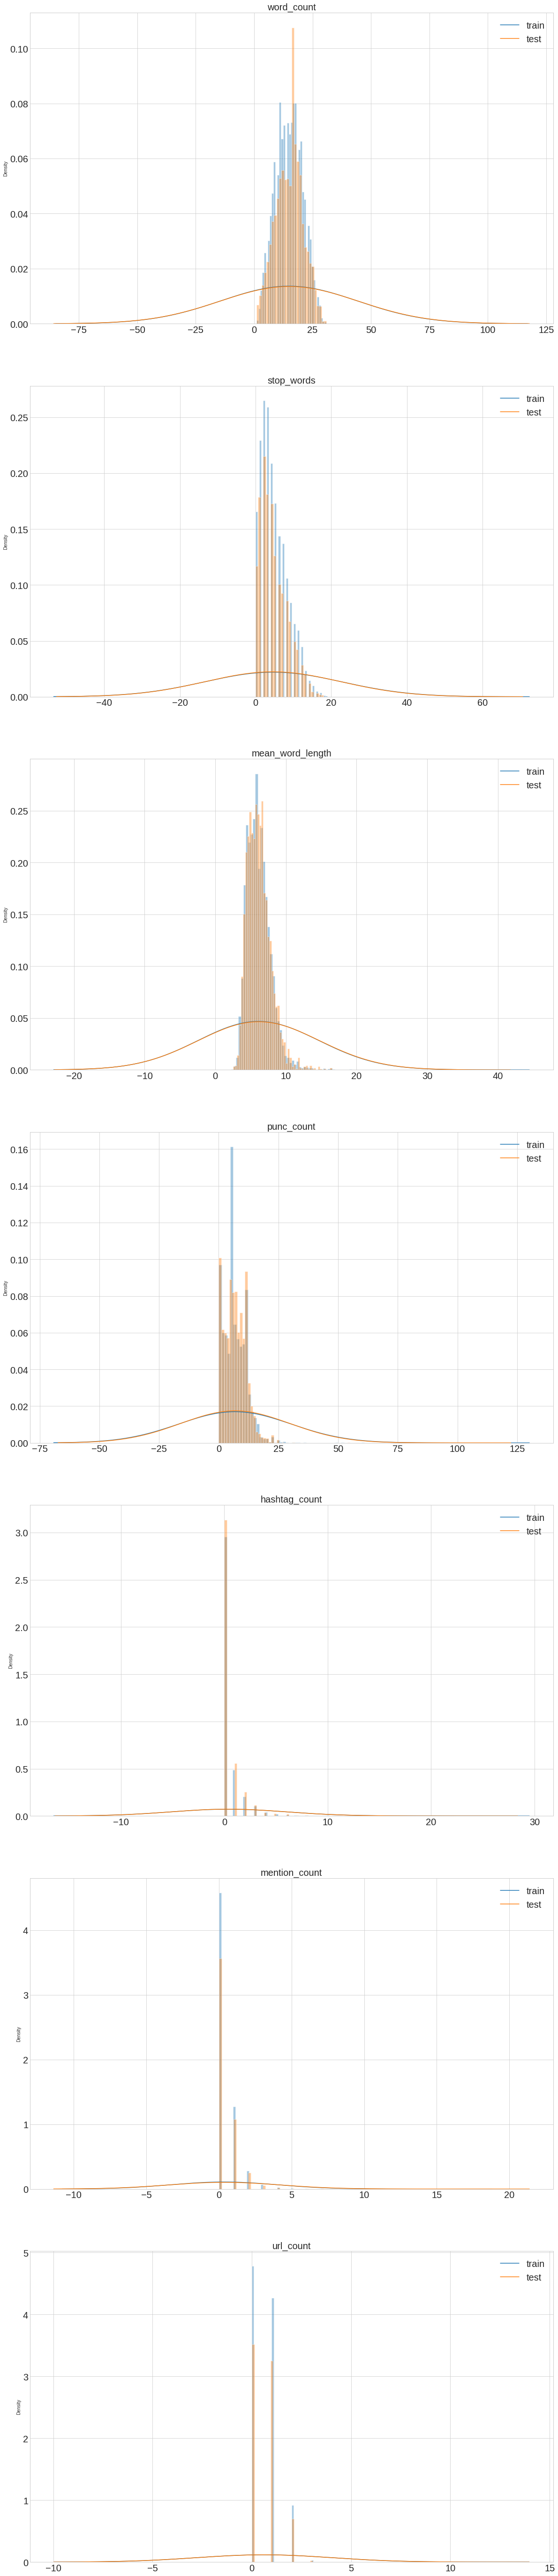

In [26]:
fields = ['word_count', 'stop_words', 
         'mean_word_length', 'punc_count','hashtag_count', 
         'mention_count', 'url_count',]
plt.style.use('seaborn-whitegrid')
f, axes = plt.subplots(len(fields), 1,
                       figsize = (20, 100))
for i, field in enumerate(fields):

    s = sns.distplot(train1.loc[:, field], 
                 ax = axes[i], kde_kws={'bw':5})
    
    sns.distplot(test1.loc[:, field], 
                 ax = axes[i], kde_kws={'bw':5})
    
    axes[i].set_title(field, fontsize = 20)
    
    axes[i].tick_params(labelsize = 20);
    
    axes[i].set_xlabel('', fontsize = 20);
    
    s.legend(labels = ['train', 'test'], fontsize = 20)